# Related to Figure 5C

Warning message:
“The `<scale>` argument of `guides()` cannot be `FALSE`. Use "none" instead as of ggplot2 3.3.4.”


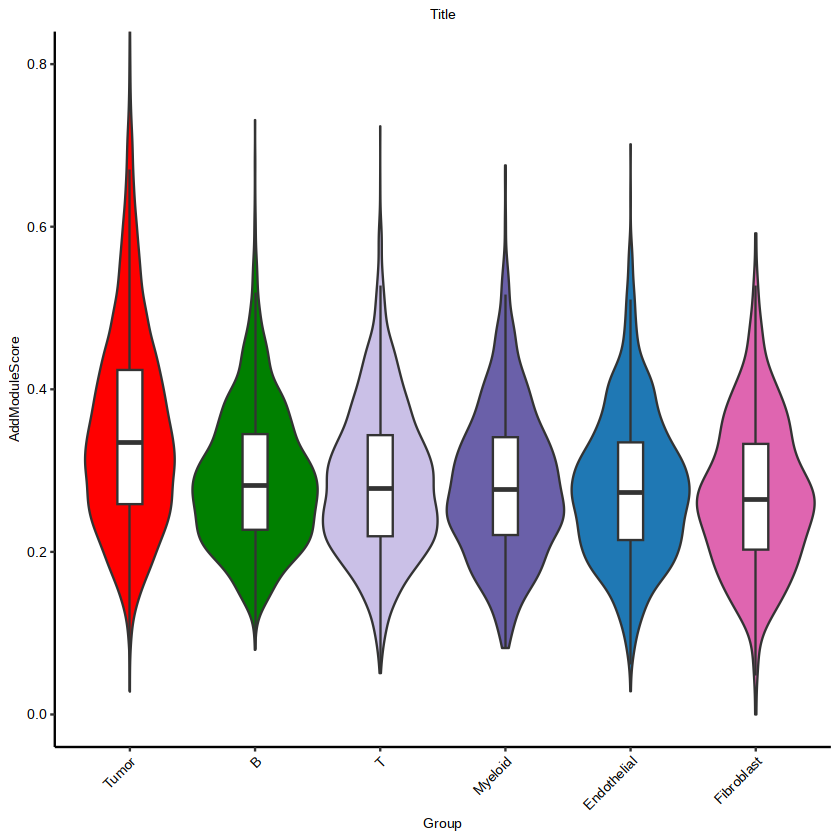

In [2]:
library(Seurat)
library(glue)
library(dplyr)
library(ggplot2)
library(ggpubr)
library(msigdbr)


df_plot = read.table('/data/yuchen_data/Stereo_seq/All_Figures/version2/Figure5/1.data/5c.data.txt', row.names=1, header=T, sep='\t')


df_plot1 = subset(df_plot, subset=TLS_expand_11_group=='Deviating')

df_plot1$scaled_value = (df_plot1$KEGG_TRYPTOPHAN_METABOLISM - min(df_plot1$KEGG_TRYPTOPHAN_METABOLISM)) / (max(df_plot1$KEGG_TRYPTOPHAN_METABOLISM) - min(df_plot1$KEGG_TRYPTOPHAN_METABOLISM))
plot_item = 'scaled_value'
group_item = 'SpotLight_Anno'


df_plot1$plot = df_plot1[[plot_item]]
df_plot1$groupby = df_plot1[[group_item]]

df_tmp = data.frame(df_plot1 %>% group_by(groupby) %>% summarise(tmp=median(plot)))
group_order <- df_tmp[rev(order(df_tmp$tmp)), ]$groupby

df_plot1$groupby = factor(df_plot1$groupby, levels=group_order)

celltypes = c('B', 'T', 'Myeloid', 'Endothelial', 'Fibroblast', 'Tumor')
colors = c('#008000','#cac0e7','#6a60a9','#1f78b4','#df65b0','#ff0000')
names(colors) = celltypes

color_order = as.character(sapply(group_order, function(x) colors[[x]]))


mylist <- lapply(setdiff(group_order, c('Tumor')), function(i) c('Tumor', i))

ggplot(df_plot1, aes(groupby,plot ,fill=groupby))+
    geom_violin(width=1)+
    scale_fill_manual(limits=group_order, values=color_order)+ #颜色
    stat_compare_means(comparisons=mylist, label="p.format",method = 'wilcox.test', symnum.args=list(cutpoints = c(0, 0.0001, 0.001, 0.01, 0.05, 1),symbols = c("****", "***", "**", "*", "ns"))) +
    guides(fill=FALSE) + 
    coord_cartesian(ylim = c(0, 0.8)) + 
    geom_boxplot(width=0.2, fill="white", outlier.alpha=0)+
    labs(title = 'Title',x = 'Group',y = 'AddModuleScore' ) +
    theme(
    plot.title    = element_text(color = 'black', size   = 8, hjust = 0.5),
    plot.subtitle = element_text(color = 'black', size   = 8,hjust = 0.5),
    plot.caption  = element_text(color = 'black', size   = 8,face = 'italic', hjust = 1),
    axis.text.x   = element_text(color = 'black', size = 8, angle = 45,hjust = 1),#
    axis.text.y   = element_text(color = 'black', size = 8, angle = 0),
    axis.title.x  = element_text(color = 'black', size = 8, angle = 0),
    axis.title.y  = element_text(color = 'black', size = 8, angle = 90),
    legend.title  = element_text(color = 'black', size  = 8),
    legend.text   = element_text(color = 'black', size   = 8),
    axis.line.y = element_line(color = 'black', linetype = 'solid'), # y轴线特征
    axis.line.x = element_line (color = 'black',linetype = 'solid'), # x轴线特征
    panel.background=element_rect(fill="white"), 
    # panel.border = element_rect(linetype = 'solid', size = 1.2,fill = NA) # 图四周框起来
    )